# CS229, Fall 2017
## Problem Set 1: Supervised Learning

This is my solutions for CS229 - Fall 2017: Machine Learning taught by Andrew Ng.

The material for Problem Set 1 is here: [ps1](https://github.com/nmduonggg/ML-CS229/blob/master/Problem%20Set%201/ps1.pdf)

This notebook contains the solution for __Question 1: Logistic Regression__

### Notation
* $x^i$: $i^{th}$ instances of the dataset
* $y^i$: $i^{th}$ target value of the dataset
* $x_j^i$: the $j^{th}$ feature of the $i^{th}$ instance
* $\theta_j$: coefficient corresponding to the $j^{th}$ feature
* $h_{\theta}$: an approximation of our model
* $m$: number of training instances
* $n$: number of features

### Question 1.a)

Consider the average empirical loss (the risk) for logistic regression:

$$J(\theta) = \frac{1}{m} \sum_{i = 1}^{m}log(1 + e^{-y^i\theta^Tx^i}) = -\frac{1}{m} \sum_{i=1}^{m}log(h_{\theta}(y^ix^i))$$
where $y^i \in \{-1, 1\}, h_{\theta}(x) = g(\theta^Tx)$ and $g(z) = 1/1 + e^{-z}$. 

Find the Hessian $H$ of this function, and show that for any vector $z$, it holds true that: 

$$z^THz \geq 0$$

#### Solution

In order to find Hessian, first we consider the derivative vector of $h_{\theta}(y^ix^i)$. Assume $z = \theta^Ty^ix^i$, we have:

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} h_{\theta}(yx) 
    & = \frac{\partial}{\partial z}g(z) \frac{\partial z}  {\partial \theta_j} \\
    & = \frac{\partial}{\partial z} \frac{1}{1+e^{-z}} \frac{\partial}{\partial \theta_j} \theta^Tyx \\
    & = \frac{e^{-z}}{(1+e^{-z})^2} yx_j \\
    & = \frac{e^{-\theta^Tyx}}{(1 + e^{-\theta^Tyx})^2} yx_j
\end{align*}
$$

Then the derivative vector of $J(\theta)$ shoulde be:

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} J(\theta) 
    &= \frac{\partial}{\partial \theta_j} \frac{-1}{m} \sum_{i=1}^{m}log(h_{\theta}(y^ix^i)) \\
    &= \frac{-1}{m}\sum_{i=1}^m \frac{1}{h_\theta(y^ix^i)} \frac{\partial}{\partial \theta_j} h_\theta(y^i x^i) \\
    &= \frac{-1}{m} \sum_{i=1}^m \frac{e^{-\theta^T y^i x^i}}{(1+ e^{-\theta^Ty^ix^i})^2 h_\theta(y^ix^i)} y^i x_j^i
\end{align*}
$$

The Hessian matrix is defined by $H_{j, k} = \frac{\partial^2 J(\theta)}{\partial \theta_j \partial \theta_k}$:

$$
\begin{align*}
H_{j, k} 
    &= \frac{\partial}{\partial \theta_k} \frac{-1}{m} \sum_{i=1}^{m} \frac{e^{-\theta^T y^i x^i}}{(1+ e^{-\theta^Ty^ix^i})^2 h_\theta(y^ix^i)} y^i x_j^i \\
    &= \frac{-1}{m} \sum_{i=1}^{m} (\frac{\partial}{\partial \theta_k}\frac{e^{-\theta^T y^i x^i}}{(1+ e^{-\theta^Ty^ix^i})^2}) \frac{1}{h_\theta(y^ix^i)} + (\frac{\partial}{\partial \theta_k} \frac{1}{h_\theta(y^ix^i)}) \frac{e^{-\theta^T y^i x^i}}{(1+ e^{-\theta^Ty^ix^i})^2} \\
    &= \frac{-1}{m} \sum_{i=1}^m (\frac{-e^{-\theta^Ty^ix^i}}{(1 + e^{-\theta^Ty^ix^i})^2}y^ix^i_jy^ix^i_k \\
    &= \frac{1}{m} \sum_{i=1}^m (h_\theta(y^ix^i) - h^2_\theta(y^ix^i))x^i_j x^i_k 
\end{align*}
$$

Furthermore, we have:

$$
\begin{align*}
\sum_i\sum_j z_i x_i x_j z_j &= \sum_i z_ix_i \sum_j z_jx_j \\
    &= (x^Tz)^2 \geq 0
\end{align*}
$$

Then we conclude that $\forall z \in R^n$:

$$
\begin{align*}
z^THz &= \sum_{j=1}^m \sum_{k=1}^m \frac{1}{m} \sum_{i=1}^m (h_\theta(y^ix^i) - h^2_\theta(y^ix^i))x^i_j x^i_k z_j z_k \\
    &= \frac{1}{m} \sum_{i=1}^m h_\theta(y^ix^i)(1 - h_\theta(y^ix^i)) \sum_{j=1}^m x^i_j z_j \sum_{k=1}^m x^i_k z_k \\
    &= \frac{1}{m} \sum_{i=1}^m h_\theta(y^ix^i)(1 - h_\theta(y^ix^i)) (z^Tx^i)^2 
\end{align*}
$$

Since 0 < $h_\theta(y^ix^i) < 1 \ \forall y^i, x^i \in R$ then $z^THz \geq 0$ as the mentioned problem statement. This assumption also indicates that $H$ is positive semidefinite.

### Question 1.b)
For the given binary classification problem, implement Newton's method for optimizing $J(\theta)$, and apply it to fit the logistic model.

In [1]:
import numpy as np  # fast numerical calculation
import pandas as pd # load dataframe
import scipy as sp # statistical functions
import matplotlib.pyplot as plt  # plotting 
from math import exp, log #basic math functions
%matplotlib inline

In [2]:
logistic_x = pd.read_fwf(".\data\logistic_x.txt", header = None)
logistic_x.columns = ["x1", "x2"]
logistic_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [3]:
logistic_y = pd.read_fwf(".\data\logistic_y.txt", header = None)
logistic_y.columns = ["y"]
logistic_y.head()

,y
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


In [4]:
## description of x and y
print(f"Shape of x and y are:{logistic_x.shape}, {logistic_y.shape}")

Shape of x and y are:(99, 2), (99, 1)


Since we also have the intercept term $\theta_0$ then each instance should be $x = (x_1, x_2, x_0)$ in which $x_0 = 1$ as a placeholder for intercept term

In [5]:
## Convert to numpy array
x = logistic_x.to_numpy()
y = logistic_y.to_numpy()
x0 = np.ones((x.shape[0], 1))
x = np.hstack((x, x0))
x

array([[ 1.3432504 , -1.3311479 ,  1.        ],
       [ 1.8205529 , -0.6346681 ,  1.        ],
       [ 0.98632067, -1.8885762 ,  1.        ],
       [ 1.9443734 , -1.635452  ,  1.        ],
       [ 0.97673352, -1.3533151 ,  1.        ],
       [ 1.9458584 , -2.0443278 ,  1.        ],
       [ 2.1075153 , -2.1256684 ,  1.        ],
       [ 2.070373  , -2.4634101 ,  1.        ],
       [ 0.86864964, -2.4119348 ,  1.        ],
       [ 1.8006594 , -2.7739689 ,  1.        ],
       [ 3.1283787 , -3.4452432 ,  1.        ],
       [ 3.0947429 , -3.6446145 ,  1.        ],
       [ 2.9086652 , -4.0065037 ,  1.        ],
       [ 2.6770338 , -3.0198592 ,  1.        ],
       [ 2.7458671 , -2.7100561 ,  1.        ],
       [ 4.1714647 , -3.4622482 ,  1.        ],
       [ 3.931322  , -2.1099044 ,  1.        ],
       [ 4.378687  , -2.3804743 ,  1.        ],
       [ 4.8016565 , -3.3803344 ,  1.        ],
       [ 4.166105  , -2.8138844 ,  1.        ],
       [ 2.4670141 , -1.6108444 ,  1.   

Define our Sigmoid, Gradient, Hessian function

In [6]:
theta = np.zeros((1, x.shape[1]))

def sigmoid(x):
    """
    x, y is a specifice value/ vector not an 2D array
    """
    global theta
    return 1/ (1+exp(-theta.dot(x)))

def cost(theta):
    m, n = x.shape
    res = 0
    for i in range(m):
        x_i = x[i].reshape((n,1))
        y_i = y[i].reshape((1,1))
        res += log(sigmoid(np.dot(x_i, y_i)))
    return res*-1/m

def gradient(x, y):
    """
    x is collection of instances: x = (x1, x2) -> 2D array shape (m, n)
    y is collection of outputs -> 2D array shape (m, 1)
    """
    m, n = x.shape
    gradient_vector = np.zeros((1, n))
    for j in range(n):
        gradient_j = 0
        for i in range(0, m):
            x_i = x[i].reshape((n,1))
            y_i = y[i].reshape((1,1))
            gradient_j += (exp(-theta.dot(np.dot(x_i, y_i)))) / \
            ((1 + exp(-theta.dot(np.dot(x_i, y_i))))**2*sigmoid(np.dot(x_i, y_i))) *y[i]*x[i, j]
            
        gradient_vector[:, j] = gradient_j * -1/m
    return gradient_vector

def hessian(x, y):
    """
    x is collection of instances: x = (x1, x2) -> 2D array shape (m, n)
    y is collection of outputs -> 1D array shape (m, 1)
    """
    m, n = x.shape  # n is number of features, m is number of instances
    hessian = np.zeros((n ,n))
    
    for j in range(n):
        for k in range(n):
            if j <= k:
                hess_jk = 0
                for i in range(m):
                    x_i = x[i].reshape((n,1))
                    y_i = y[i].reshape((1,1))
                    hess_jk = hess_jk + (sigmoid(np.dot(x_i, y_i)) - (sigmoid(np.dot(x_i, y_i)))**2) \
                    *x[i, j]*x[i, k] / m
                hessian[j, k] = hess_jk
            elif j != k: hessian[k, j] = hessian[j, k]
    return hessian

Let's write down our Newton's method formula:

$$\theta = \theta - H^{-1}\nabla_\theta J(\theta)$$

Here is the implementation:

In [7]:
def newton(x, y):
    global theta
    best_cost = 1e9
    current_cost = 1e9
    while current_cost - best_cost <= 0:
        H = hessian(x, y)
        grad = gradient(x, y).T
        inv_H = np.linalg.inv(H)
        theta = theta - np.dot(inv_H, grad).T
        
        best_cost = current_cost
        current_cost = cost(theta)
        
        print(*theta, end = " ")
        print("cost", current_cost)
newton(x, y)

[ 0.10094783  0.68717922 -0.02020202] cost 0.4419963629953528
[ 0.16167367  0.97694684 -0.18296127] cost 0.404726467462984
[ 0.22709208  1.07356426 -0.33028373] cost 0.38934275369023547
[ 0.26996923  1.10277712 -0.55988664] cost 0.3780145366198116
[ 0.32026887  1.08805672 -0.72003052] cost 0.3688677348301264
[ 0.35294491  1.09847953 -0.92257464] cost 0.3614701177945898
[ 0.39559293  1.08434292 -1.04784102] cost 0.35553086030587944
[ 0.42110036  1.09807705 -1.21966356] cost 0.3507060220651394
[ 0.45781563  1.08699752 -1.31576939] cost 0.3468158527994224
[ 0.47753801  1.10268602 -1.46306634] cost 0.34363501395746937
[ 0.50942616  1.09314922 -1.5358991 ] cost 0.34106046445703553
[ 0.52438342  1.10967847 -1.66354737] cost 0.33894489293704044
[ 0.55232163  1.10072653 -1.71747047] cost 0.3372271405863709
[ 0.56330869  1.11750774 -1.8292645 ] cost 0.33581046413793875
[ 0.58801426  1.10857797 -1.86759202] cost 0.33465709720742665
[ 0.59566465  1.12532779 -1.96656399] cost 0.3337034724743698
[ 

### Question 1.c)
Now we plot the data and our model after applying Newton's method
I will simplify this section by separate the set of training instances into 2 group corresponding to $y = 1$ and $y = -1$

In [8]:
final_arr = np.hstack((x, y))
final_arr

array([[ 1.3432504 , -1.3311479 ,  1.        , -1.        ],
       [ 1.8205529 , -0.6346681 ,  1.        , -1.        ],
       [ 0.98632067, -1.8885762 ,  1.        , -1.        ],
       [ 1.9443734 , -1.635452  ,  1.        , -1.        ],
       [ 0.97673352, -1.3533151 ,  1.        , -1.        ],
       [ 1.9458584 , -2.0443278 ,  1.        , -1.        ],
       [ 2.1075153 , -2.1256684 ,  1.        , -1.        ],
       [ 2.070373  , -2.4634101 ,  1.        , -1.        ],
       [ 0.86864964, -2.4119348 ,  1.        , -1.        ],
       [ 1.8006594 , -2.7739689 ,  1.        , -1.        ],
       [ 3.1283787 , -3.4452432 ,  1.        , -1.        ],
       [ 3.0947429 , -3.6446145 ,  1.        , -1.        ],
       [ 2.9086652 , -4.0065037 ,  1.        , -1.        ],
       [ 2.6770338 , -3.0198592 ,  1.        , -1.        ],
       [ 2.7458671 , -2.7100561 ,  1.        , -1.        ],
       [ 4.1714647 , -3.4622482 ,  1.        , -1.        ],
       [ 3.931322  , -2.

In [9]:
x1 = final_arr[:, 0]
x2 = final_arr[:, 1]

In [10]:
colors = np.where(y == 1, y, 'g')
colors = np.where(y == -1, colors, 'b')
colors

array([['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
       ['b'],
      

In order to plot decision boundary, we will find set of pairs $(x_1, x_2)$ such that their $h_\theta = 0.5$

$$\frac{1}{1 + e^{-\theta^Tx}} = 0.5 \implies \theta^Tx = 0$$

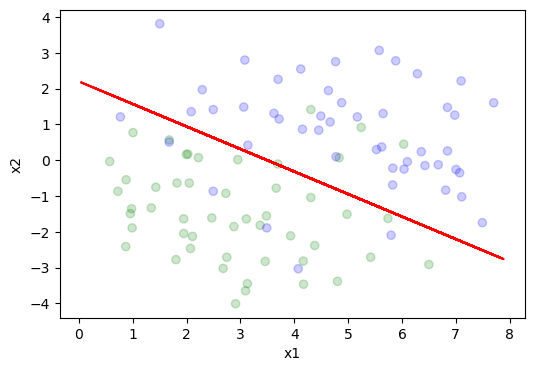

In [11]:
plt.figure(figsize = (6, 4))
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x = x1, y = x2, c = colors.reshape(-1), alpha = 0.2)

m, n = x.shape
theta = theta.reshape(n)  #theta1, theta2, theta0
dec_x1 = np.random.random(99)*8
plt.plot(dec_x1, (-theta[2] - theta[0]*dec_x1) / theta[1], "r")
plt.show()